<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Einführung Machine Learning
### Sommersemester 2022
Prof. Dr. Heiner Giefers

# Das Gradientenverfahren

In [245]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [246]:
# Test Case
m_c, n_c = 2, 4
np.random.seed(0)
X = np.random.randn(m_c, n_c)
theta_c = np.r_[[[0]],np.random.randn(n_c, 1)]
y_c = np.random.randn(m_c, 1)

Bei der Logistischen Regression haben wir das Gradientenverfahren benutzt, um die Parameter unseres Modells, einer linearen Funktion $$Z = f_{\theta}(x)=\theta_0+\theta_ix$$ transformiert durch die Aktivierungsfunktion $$\hat y = h_{\theta}(x) = \sigma(Z) = \frac{1}{1+e^{-Z}}$$ schrittweise zu verbessern.


Die Verbesserung, bzw. die Qualität des Modells, haben wir anhand der Kostenfunktion $$J_{\theta}(x)=-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat y^{(i)}) + (1-y^{(i)})\log(1- \hat y^{(i)})]$$ berechnet.

Wir wollen nun schrittweise die Modellfunktion, die Kostenfunktion sowie das Gradientenverfahren als Python-Funktionen definieren.
Um uns die Berechnungen zu vereinfachen, hängen wir an unseren Datensatz eine Spalte mit Einsen an.
Damit können wir alle Parameter $\theta$ (inklusive des Bias-Parameters) in einer Vektor-Operation verarbeiten.

In [247]:
X_c = np.c_[np.ones(X.shape[0]).T,X]
X_c

array([[ 1.        ,  1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.        ,  1.86755799, -0.97727788,  0.95008842, -0.15135721]])

## Modellfunktion
**Aufgabe: Schreibe eine Funktion $f$, die folgende Parameter erhält:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält.
2. Die Parameter $\theta$

**$f$ soll folgende lineare Funktion implementieren:** $$Z = f_{\theta}(X)=X\theta$$


In [248]:
def f(X, theta):
    """evaluates linear function.
    Arguments:
        X: value
        theta: Parameter
    """
    
    Z = np.matmul(X, theta)
    
    return Z

In [249]:
# Test Cell
#----------

Z = f(X_c, theta_c)
#----------
# f

assert Z.shape == (m_c, 1), 'Use correctly sequenced matrix multiplication'
assert np.isclose(Z[0], 3.38207), 'Expected 3.38207 but got %.5f' %Z[0]

del Z

**Aufgabe: Implementieren Sie die Modellunktion $h$. Die Funktion $h$ soll die gleichen Parameter wie $f$ erhalten und die Funktion $f$ intern aufrufen. Das Ergebnis von $f$ soll durch die Sigmoid-Aktivierungsfunktion transformiert werden.:** $$\hat y = h_{\theta}(x) = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

In [250]:
def h(X, theta):
    """returns the sigmoid of the linear function.
    Arguments:
        X: Data
        theta: Parameters
    """
    
    Z = f(X, theta)

    y_hat = 1/(1+np.exp(-Z))
    
    return y_hat

In [251]:
# Test Cell
#----------

y_hat = h(X_c, theta_c)
#----------
# h

assert y_hat.shape == (m_c, 1)
assert np.isclose(y_hat[0], 0.96713), 'Expected 0.96713 but got %.5f' %y_hat[0]

del y_hat

**Aufgabe: Berechnen Sie nun die Kostenfunktion. Schreiben Sie eine Funktion $J$, die folgende Parameter erhält:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\theta$.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.

**$J$ berechnet die folgende Kostenfunktion:** $$J_{\theta}(x)=-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat y^{(i)}) + (1-y^{(i)})\log(1- \hat y^{(i)})]$$

In [252]:
def J(X,theta,y):
    """computes the Cross-entropy cost function
    Arguments:
        X: Data
        theta: Parameter
        y: True labels
    """

    m = len(X)
    y_hat = h(X, theta)
    result_sum = 0
    for i in range(1, m + 1):
      result_sum += ((y[i-1]) * (np.log((y_hat[i-1])))
      + ((1 - (y[i-1])) * np.log(1 - (y_hat[i-1]))))

    result = (-(1 / m)) * result_sum

    return result.squeeze()

In [253]:
# Test Cell
#----------

cost = J(X_c,theta_c,y_c)
#----------
# J

assert cost.shape == (), 'Use correctly sequenced matrix multiplication'
assert np.isclose(cost, 0.66739), 'Expected 0.66739but got %.5f' %cost

del cost

## Gradientenverfahren

**Schreibe für das Gradientenverfahren eine Funktion `grads`, die folgende Parameter erhält**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\theta$.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.

**und den Gradienten $\partial\theta$ für die Parameter $\theta$ berechnet** 

Dabei ist $\partial\theta$ ein Vektor der Dimension `(n+1, 1)` mit den Gradienten der Parameter: $$ \partial \theta = \frac{1}{m}X^T(\hat y-y)$$

In [254]:
def grads(X,theta,y):
    """Berechnet die Gradienten der Kostenfunktion abhängig von dern Parametern.
    Arguments:
        X: Data
        theta: Parameter
        y: True labels
    """
    
    m = len(X)
    y_hat = h(X, theta)
    xt = np.matrix.transpose(X)

    print(xt)
    print(np.subtract(y_hat, y))

    dtheta = (1 / m) * np.matmul(xt, np.subtract(y_hat, y))
    
    return dtheta

In [255]:
# Test Cell
#----------

dt = grads(X_c,theta_c,y_c)
#----------
# grads

assert dt.shape == theta_c.shape
assert np.isclose(dt[1], 0.38273), 'Expected 0.38273 but got %.5f' %dt[1]

[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.20610183]
 [0.21518991]]


**Aufgabe: Schreiben Sie nun eine Funktion, die die Modellparameter aufgrund der berechneten Gradienten aktualisiert.Die Funktion `update`erhält die Parameter $\theta$, die Gradienten $\partial \theta$ sowie die Lernrate $\alpha$ und berechnet:**

$$\theta = \theta - \alpha \cdot \partial \theta$$

In [256]:
def update(theta, dtheta, alpha):
    """updates parameters using gradient decent updating rule."""
    
    theta = theta - (alpha * dtheta)
    
    return theta

In [257]:
# Test Cell
#----------

t = update(theta_c, dt, 0.1)
#----------
# update

assert t.shape == theta_c.shape
assert np.isclose(t[1], -0.141491), 'Expected -0.141491 but got %.5f' %t[1]
del t, dt

Nun können wir das iterative Gradientenverfahren programmieren.
**Aufgabe: Schreiben Sie eine Funktion `gradient_descent`, die folgende Parameter erhät:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\theta$.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.
4. Die Lernrate $\alpha$.
5. Die Anzahl der Iterationen.
**Die Funktion soll die Trainierten Modellparameter $\theta$ zurückgeben.**

*Hinweis*: Berechnen Sie Kosten mit der Funktion `J` und hängen Sie diese Kosten nach jedem Berechnungsschritt and die Liste `cost` an $\rightarrow$ Berechnen Sie die Gradienten mit der Funktion `grads` $\rightarrow$ Verwenden Sie diese Gradienten um die Parameter mit der Funktion `update`

In [258]:
def gradient_decent(X, theta, y, alpha=0.1, iterations=100):
    """performs gradient decent optimization.
    Arguments:
        X: Data
        theta: Parameter
        y: True labels
        alpha(default=0.1): Learning rate
        iterations(default=100): number of updating iterations
    """
    
    costs = []
    
    for i in range(iterations):
      j = J(X, theta, y)
      costs.append(j)
      grad = grads(X, theta, y)
      theta = update(theta, grad, alpha)
        
    return theta, costs

[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.20610183]
 [0.21518991]]
[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.20083952]
 [0.19003649]]
[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.19512433]
 [0.16783367]]
[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.18897458]
 [0.14823902]]
[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.18241792]
 [0.1309379 ]]
[[ 1.          1.        ]
 [ 1.76405235  1.86755799]
 [ 0.40015721 -0.97727788]
 [ 0.97873798  0.95008842]
 [ 2.2408932  -0.15135721]]
[[0.17549133]
 [0.11564868]]
[[ 1.     

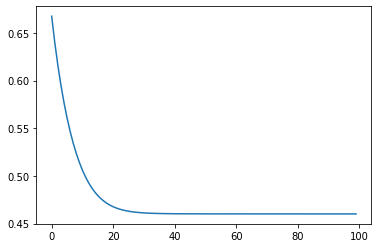

In [259]:
# Test Cell
#----------

t, costs = gradient_decent(X_c, theta_c, y_c)
#----------
# gradient_decent

assert len(costs) == 100, 'Make sure to calculate and append the cost in every iteration.'
assert np.isclose(t[4], 1.05769), 'Expected 1.05186 but got %.5f' %t[4]
plt.plot([i for i in range(len(costs))],costs)
del t, costs

## Anwendung der Funktionen auf einen realistischen Datensatz

Wir habe nun alle Funktionen um unser logistisches Regressionsmodell für einen *echten* Datensatz zu einzusetzen.
Wir verwenden hier den Brustkrebs-Datensatz aus Sklearn:

In [260]:
scaler = MinMaxScaler()
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.3)

# preprocessing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

X_train = np.c_[np.ones(X_train.shape[0]).T,X_train]
X_test = np.c_[np.ones(X_test.shape[0]).T,X_test]

In [261]:
# initializing parameters
theta = np.zeros((len(X_train[0]), 1))

#training the model
theta, costs = gradient_decent(X_train, theta, y_train.reshape(-1, 1), alpha = 2)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 [-1.30156835e-01]
 [ 1.62655904e-02]
 [-1.75672102e-02]
 [-1.36161281e-01]
 [-4.81005401e-01]
 [-1.44015409e-01]
 [ 3.03309687e-01]
 [ 4.14092672e-02]
 [-2.05916381e-01]
 [-1.30819961e-01]
 [ 2.00565761e-03]
 [-1.94712231e-01]
 [-5.66426775e-02]
 [ 7.54789176e-02]
 [ 1.56892039e-02]
 [ 6.41231746e-05]
 [ 4.95817011e-01]
 [ 6.82759166e-02]
 [ 2.32001792e-03]
 [-1.50021719e-01]
 [-6.90196396e-02]
 [-1.30756899e-01]
 [-1.49795616e-01]
 [-1.50914430e-02]
 [-2.78597173e-01]
 [ 1.33277511e-01]
 [-1.55307657e-02]
 [-7.65943690e-02]
 [-6.04280511e-02]
 [-4.19054817e-01]
 [-2.59033676e-02]
 [ 1.00867572e-01]
 [ 1.80089497e-01]
 [ 1.43346807e-01]
 [-1.03159802e-01]
 [ 1.14069792e-02]
 [-1.36385450e-01]
 [ 2.90898973e-02]
 [ 1.46374270e-01]
 [ 4.40714943e-01]
 [-1.86752128e-01]
 [-1.00608910e-02]
 [-8.67342677e-03]
 [-7.62035750e-02]
 [-6.69282972e-02]
 [-3.94179713e-02]
 [ 2.17658370e-01]
 [ 2.92663447e-02]
 [-6.20251705e-02]
 [

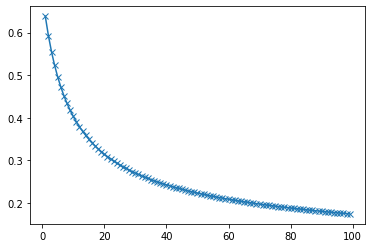

In [262]:
plt.plot(range(1,len(costs)),costs[1:], "x-")
plt.show()

In [263]:
# measuring performance
y_pred = (h(X_test,theta) >= 0.5)*1
acc = 100-np.sum(np.abs(y_pred-y_test))*100/len(y_test)

print("Die classifcation accuracy ist: ",acc)

Die classifcation accuracy ist:  96.49122807017544
